<a href="https://colab.research.google.com/github/sykathowlader/bootcamp_project/blob/main/random_forest_sy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [ ]:
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


I want to create a Random Forest model. All my data are numeric. Let's start splitting the data into training and testing.

In [ ]:
# get data and label
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)
print (X.shape)
print (y.shape)

#scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training/testing split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Instantiate the model with 10 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=20,criterion="entropy")

#Train the model
Random_Forest_model.fit(X_train, y_train)

#make predictions
y_pred = Random_Forest_model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

#Calculate accuracy metric
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')

(253680, 21)
(253680,)
[0. 0. 0. 0. 2.]
219620    0.0
132821    0.0
151862    0.0
139717    0.0
239235    0.0
Name: Diabetes_012, dtype: float64
The accuracy is:  83.76103752759381 %


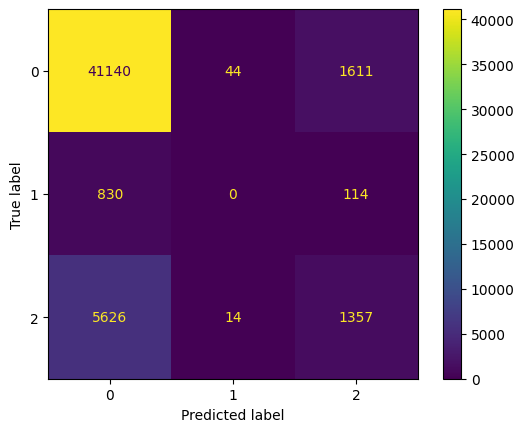

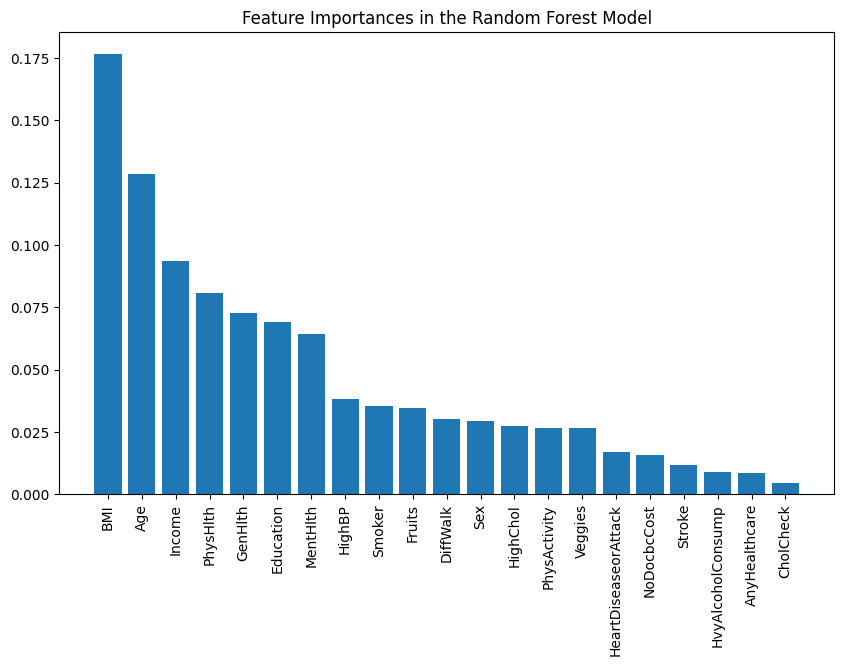

[0.03833434 0.02735303 0.00466836 0.1765547  0.03527573 0.01186521
 0.01685541 0.02667993 0.03448353 0.02651926 0.00869343 0.00867101
 0.01563289 0.07273947 0.06428377 0.08083809 0.03009317 0.02946518
 0.12865038 0.06897184 0.09337126]


In [ ]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Plotting feature importance
feature_importances = Random_Forest_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in the Random Forest Model")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()
print(feature_importances)
